In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
Path = os.getcwd()

In [66]:
diameter = 7.874  #cm

#Data used to plot Voltage vs. Current squared or k_2
V1 = np.array([300, 291, 281, 271, 260, 251, 239, 230, 219, 211, 198]) #Volts
Current1 = np.array([1.97, 1.94, 1.90, 1.88, 1.83, 1.79, 1.75, 1.68, 1.66, 1.64, 1.56]) #Amps
volt_error = np.array([2.5,3,3,3,3,3,3,3,3,3,3])
current1_error = np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01])
current_squared_error = np.array([0.039, 0.0388, 0.038, 0.0376, 0.0368, 0.0358, 0.035, 0.0336, 0.0332, 0.0328, 0.0312])

#Data used to plot our Magnetic field as a function of Current or k_1
Current2 = np.array([1.98, 1.90, 1.79, 1.70, 1.60, 1.50, 1.41, 1.29]) #Amps
Mag2 = np.array([1482.35, 1407.27, 1342.03, 1267.27, 1195.93, 1128.28, 1060.73, 967.63]) #uT
current2_error = np.array([0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005])
Mag_error = np.array([10,10,10,10,10,10,10,10])

In [5]:
diameter/2

3.937

We are trying to find the charge of the electron using this eqation:

\begin{equation}
\frac{e}{m} = \frac{2}{k_1^2k_2r^2}
\end{equation}

Where $k_2$ would be our slope for part 1 of the experiment while $k_1$ would be our slope for part 2 of our experiment

In [71]:
Amps = []

for i in range(len(Current1)):
    Amps.append(Current1[i]**2)

In [85]:
slope1, intercept1 = np.polyfit(V1,Amps, 1)

#Units: Amps^2/Volts
print("Slope = " + str(slope1))
print("Intercept = " + str(intercept1))

xrange1 = np.linspace(200,305,1000)

expected = []
residuals1 = []
for i in range(len(V1)):
    expected.append(V1[i] * slope1 + intercept1)
    residuals1.append((expected[i]-Amps[i])) 

y1 = slope1*xrange1+intercept1

Slope = 0.014132847565841983
Intercept = -0.3430785139664815


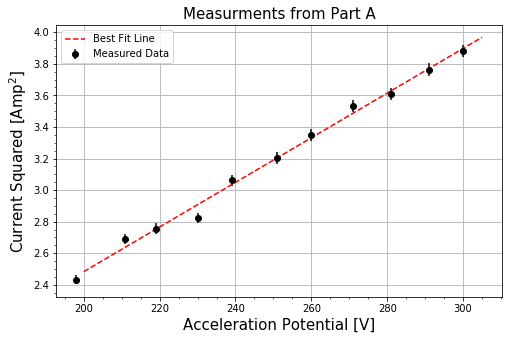

In [91]:
plt.figure(figsize = [8,5])
plt.errorbar(V1,Amps, yerr = current_squared_error,fmt ='o',color = 'black',
             label='Measured Data')
plt.plot(xrange1,y1,'--',c='red',label='Best Fit Line')
plt.grid()
plt.ylabel("Current Squared [Amp$^2$]", size = 15)
plt.xlabel("Acceleration Potential [V]", size = 15)
plt.title("Measurments from Part A", size=15)
plt.minorticks_on()
plt.legend()
plt.savefig(Path + "/Voltage_vs_Current_squared.png",bbox_inches='tight')
plt.show()

In [90]:
print("So k_2 is "+ str(round(slope1,5)) + " Amps^2/Volt")

So k_2 is 0.01413 Amps^2/Volt


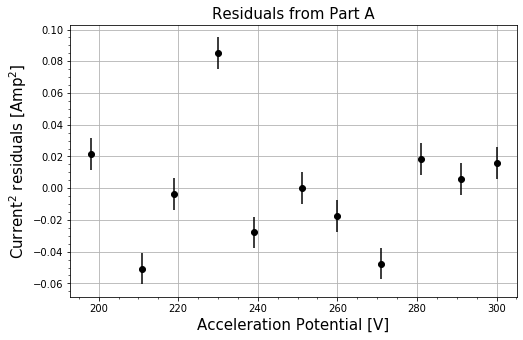

In [92]:
plt.figure(figsize = [8,5])
plt.errorbar(V1, residuals1, yerr = current1_error,fmt ='o',color = 'black')
plt.grid()
#plt.xlim([0,320])
#plt.ylim([-0.15,0.1])
plt.ylabel("Current$^2$ residuals [Amp$^2$]", size = 15)
plt.xlabel("Acceleration Potential [V]", size = 15)
plt.title("Residuals from Part A", size=15)
plt.minorticks_on()
plt.savefig(Path + "/Voltage_vs_Current_squared_residuals.png",bbox_inches='tight')
plt.show()

Now to find $k_1$

In [43]:
slope2, intercept2 = np.polyfit(Current2,Mag2, 1)

#Units: uT/Amps
print("Slope = " + str(slope2))
print("Intercept = " + str(intercept2))

xrange2 = np.linspace(1.25,2,1000)

expected = []
residuals2 = []
for i in range(len(Mag2)):
    expected.append(Current2[i] * slope2 + intercept2)
    residuals2.append((expected[i]-Mag2[i])) 
    
y2 = slope2*xrange2+intercept2

Slope = 732.8216167904578
Intercept = 25.02866335870831


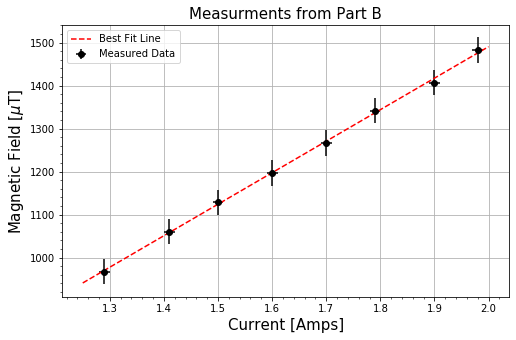

In [46]:
plt.figure(figsize = [8,5])
plt.errorbar(Current2, Mag2, xerr = current2_error*2, yerr=Mag_error*3,fmt ='o',color = 'black',
            label = 'Measured Data')
plt.grid()
plt.plot(xrange2,y2,'--',c='red',label='Best Fit Line')
plt.xlabel("Current [Amps]", size = 15)
plt.ylabel("Magnetic Field [$\mu$T]", size = 15)
plt.title("Measurments from Part B", size=15)
plt.minorticks_on()
plt.legend()
plt.savefig(Path + "/Magnetic_field_vs_Current.png",bbox_inches='tight')
plt.show()

In [45]:
print("So k_1 is "+ str(round(slope2,6)) + " uT/Amps")

So k_1 is 732.821617 uT/Amps


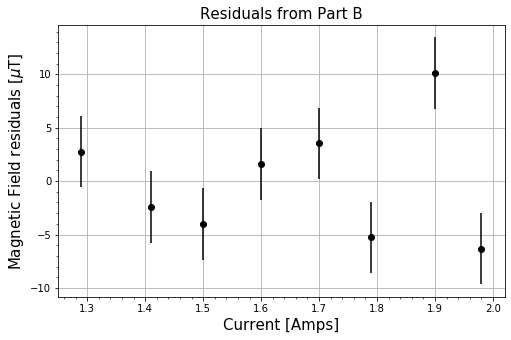

In [21]:
plt.figure(figsize = [8,5])
plt.errorbar(Current2, residuals2, xerr = current2_error, yerr=Mag_error/3,fmt ='o',color = 'black')
plt.grid()
#plt.xlim([0,2])
#plt.ylim([-0.015,0.015])
plt.xlabel("Current [Amps]", size = 15)
plt.ylabel("Magnetic Field residuals [$\mu$T]", size = 15)
plt.title("Residuals from Part B", size=15)
plt.minorticks_on()
plt.savefig(Path + "/Magnetif_field_vs_Current_residuals.png",bbox_inches='tight')
plt.show()